In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.signal import correlate, correlation_lags

In [4]:
def input_data(file_1, file_2):
    if file_1.__contains__('.csv'):
        df = pandas.read_csv(file_1)
    else:
        df = pandas.read_excel(file_1, sheet_name='Sheet1')
        
    if file_2.__contains__('.csv'):
        tdf = pandas.read_csv(file_2)
        tobii_left = tdf['left_r']
        tobii_right = tdf['right_r']
        # tobii_mean = tdf['mean']
    else:
        tdf = pandas.read_excel(file_2, index_col=1, sheet_name='Data')
        tdf = tdf.rename(columns={'Pupil diameter left [mm]': 'left_r', 'Pupil diameter right [mm]': 'right_r', 
                                 'Recording timestamp [ms]': 'time'})
        tdf = tdf[['time', 'left_r', 'right_r']].iloc[1:, :]
        # tobii_mean = []
        # for i, c in zip(tobii_left, tobii_right):
        #     tobii_mean.append(np.mean((i, c)))

    return df, tdf

file_1 = '02_19/pupil_data_sun.csv'
file_2 = 'tobii/dark_video_tobii_sun.xlsx'
df, tdf = input_data(file_1, file_2)
video_len = 60+12 #second

# formalise the opencv data (into second)
# df = df[['time', 'left_r', 'right_r']]
s = df['time'][0]
avg_amount = (list(df['time'])[-1] - s)/video_len # calculate interval each second
df['time'] = [ ((i-s)/avg_amount)-4 for i in df['time']]#remove the first 4 seconds, fluctuaion of light in video

df = df[df['time'] >= 0]
df = df.set_index('time')

#formalise eye tracker data (into second)
tdf['time'] = [ (i/1000)-4 for i in tdf['time']] #remove the first 4 seconds, fluctuaion of light in video
tdf['left_r'] = [i/2 for i in tdf['left_r']]
tdf['right_r'] = [i/2 for i in tdf['right_r']]
tdf = tdf[tdf['time'] >= 0]
tdf = tdf.set_index('time')

In [5]:
df.head(36)

,left_x,left_y,left_r,left_t,right_x,right_y,right_r,right_t,Unnamed: 9
time,,,,,,,,,
0.004826,176.000000,37.0,27.294786,43.655172,106.000000,40,17.000000,41.878049,NaN
0.034489,185.500000,47.5,23.162569,40.011364,108.500000,65.0,17.500000,43.431818,NaN
0.062053,184.500000,44.0,25.401871,44.868132,120.000000,63.0,17.000000,46.821429,NaN
0.092174,176.000000,36,15.500000,45.076923,143.863113,51.13225173950195,18.000000,44.077778,NaN
0.119365,194.000000,48.0,21.587132,42.839506,91.500000,60.0,15.500000,44.592593,NaN
0.147074,199.500000,21,21.000000,37.280000,149.000000,31,16.000000,46.447368,NaN
0.176635,169.000000,39.5,49.570755,39.890110,235.500000,41.0,31.197054,27.450549,NaN
0.204805,216.000000,38,25.000000,39.344444,0.000000,None,NaN,NaN,NaN
0.234954,0.000000,None,189.000000,56.000000,29.000000,30.284313725490197,NaN,NaN,NaN


In [6]:
from collections import OrderedDict
def get_quartiles(arr):
    arr = [i for i in arr if not np.isnan(i)]
    arr = np.sort(arr)
    mid = int(len(arr)/2)
    if(len(arr)%2 == 0):
        Q1 = np.median(arr[:mid])
        Q3 = np.median(arr[mid:])
    else:
        Q1 = np.median(arr[:mid])
        Q3 = np.median(arr[mid:])
    return Q1,Q3

def eliminate_outliers(values, bias = 0.5):
    print('before', len(values))
    q1,q3 = get_quartiles(values)
    iqr = q3 - q1
    lowerLimit = q1 - bias*iqr
    upperLimit = q3 + bias*iqr
    print('lower', lowerLimit, q1, q3, 'upper', upperLimit)
    result = []
    for v in values:
        if v < lowerLimit or v > upperLimit: result.append(np.nan)
        else:
            result.append(v)
    print('after', len([i for i in result if i is not np.nan]), '\n')
    return result

before 3984
lower 16.925 17.5 29.0 upper 29.575
after 2370 

before 3984
lower 76.25 107.5 170.0 upper 201.25
after 3273 

total valid radius 1946


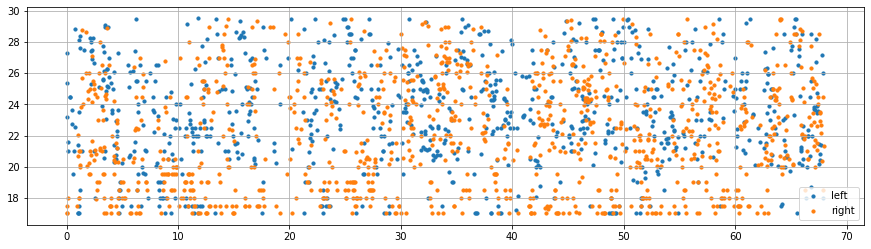

In [7]:
#remove by radius
values = np.concatenate( [list(df['left_r']), list(df['right_r'])] )
sep = len(df['left_r'])

values = eliminate_outliers(values, 0.05)
df['left_r'] = values[:sep]
df['right_r'] = values[sep:]

#remove by x coordinate
values = np.concatenate( [list(df['left_x']), list(df['right_x'])] )
sep = len(df['left_x'])

values = eliminate_outliers(values)
df['left_x'] = values[:sep]
df['right_x'] = values[sep:]

left_r = []
right_r = []
for i, r in df.iterrows():
    if np.isnan(r['left_x']):
        left_r.append(np.nan)
    else:
        left_r.append(r['left_r'])
        
    if np.isnan(r['right_x']):
        right_r.append(np.nan)
    else:
        right_r.append(r['right_r'])
        
df['left_r'] = left_r
df['right_r'] = right_r

#plot left and right
fig, ax = plt.subplots(figsize=(15, 4))
ax.scatter(x=list(df.index), y=df['left_r'], s=10, label='left')
ax.scatter(x=list(df.index), y=df['right_r'], s=10, label='right')
ax.grid()
ax.legend(loc='best')

print('total valid radius', len([i for i in left_r if not np.isnan(i)]) + len([i for i in right_r if not np.isnan(i)]))

## scatter plot of radius of eye_tracker

before 8296
lower 0.9775 0.985 1.06 upper 1.0675000000000001
after 5184 



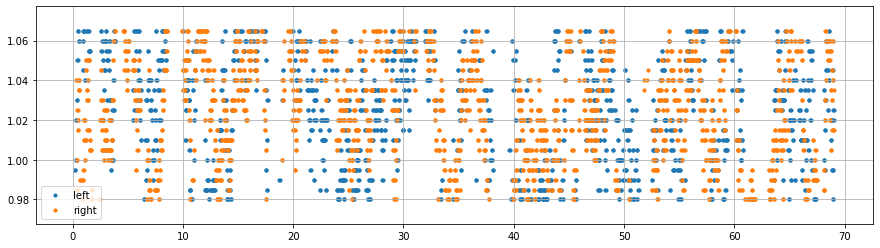

In [8]:
values = np.concatenate( [list(tdf['left_r']), list(tdf['right_r'])] )
sep = len(tdf['left_r'])

values = eliminate_outliers(values, 0.1)
tdf['left_r'] = values[:sep]
tdf['right_r'] = values[sep:]

#plot left and right
fig, ax = plt.subplots(figsize=(15, 4))
ax.scatter(x=list(tdf.index), y=tdf['left_r'], s=10, label='left')
ax.scatter(x=list(tdf.index), y=tdf['right_r'], s=10, label='right')
ax.grid()
ax.legend(loc='best')

In [9]:
#merge left and right
def merge_both_side(df):
    result = []
    for i, r in df.iterrows():
        a = r['left_r']
        b = r['right_r']

        if not np.isnan(a) and not np.isnan(b):
            result.append(np.mean((a, b)))
        elif not np.isnan(a):
            result.append(a)
        elif not np.isnan(b):
            result.append(b)
        else:
            result.append(np.nan)
    df['pupil'] = result
    df = df.drop(labels=['left_r', 'right_r'], axis=1)
    return df

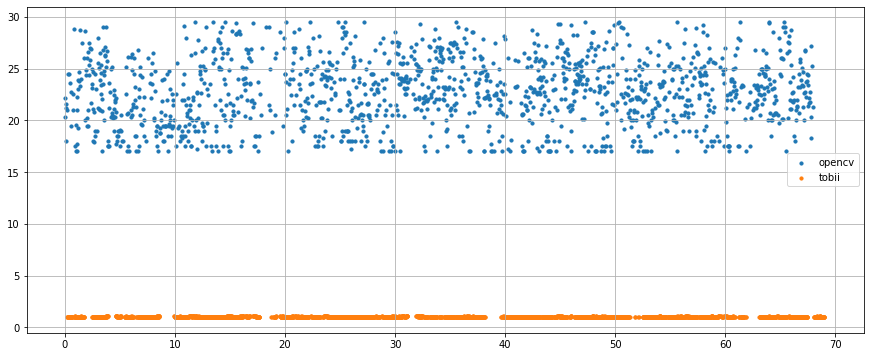

In [10]:
merge_df = merge_both_side(df)
merge_tdf = merge_both_side(tdf)

fig, ax = plt.subplots(figsize=(15, 6))

ax.scatter(x=list(merge_df.index), y=merge_df['pupil'], s=10, label='opencv')
ax.scatter(x=list(merge_tdf.index), y=merge_tdf['pupil'], s=10, label='tobii')

ax.grid()
ax.legend(loc='best')

In [11]:
def normalise(df):
    result = {}
    values = []
    current_sec = 0
    for i, r in df.iterrows():
        if i <= current_sec:
            if r['pupil'] != 0 and not np.isnan(r['pupil']):
                values.append(r['pupil'])
        else:
            if len(values) == 0:
                if current_sec > 0:
                    result.update({current_sec: result[current_sec-1]}) #if no available value, then select the last one
                else:
                    result.update({current_sec: np.nan})
            else:
                values = sorted(values)
                if len(values) >= 4:
                    values = values[1:-2] #remove the biggest and smallest
                print(current_sec, values)
                result.update({current_sec: np.mean(values)})
                values = []
                
            current_sec += 0.5
            if r['pupil'] != 0 and not np.isnan(r['pupil']):
                values.append(r['pupil'])
    
    #for the last sec
    values = sorted(values)
    if len(values) >= 4:
        values = values[1:-2] #remove the biggest and smallest
    result.update({current_sec: np.mean(values)})

    return result

In [12]:
def cal_rate(ary, baseline=None): #pupil change rate
    result = []
    if baseline is None:
        for a, b in zip(ary[:-2], ary[1:]):
            result.append( (b-a)/a )
    else:
        for a in ary:
            result.append( (a-baseline)/baseline)
    return result

def plot_rate(ary1, ary2, timeframe, overlap):
    ### plot
    total = 0 #total matching
    for i in range(min(len(ary2), len(ary1))-1):
        if ary1[i] >= ary1[i+1] and ary2[i] >= ary2[i+1]: total += 1
        elif ary1[i] <= ary1[i+1] and ary2[i] <= ary2[i+1]: total += 1

    print('total matching ', total, len(ary1)-1, len(ary2)-1, total/(len(ary1)-1), total/(len(ary2)-1))

    fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8))
    ax1.plot(ary1, label='eye_tracker')
    ax1.plot(ary2, label='opencv software')

    ax1.scatter(x=np.arange(len(ary1)), y=ary1, s=10, color='red')
    ax1.scatter(x=np.arange(len(ary2)), y=ary2, s=10, color='red')

    ax1.set_xlabel('time(per '+ str(timeframe) +' second)')
    ax1.set_ylabel('percentage changes in pupil size')
    ax1.grid()
    ax1.legend(loc='best')
    
    corr = correlate(ary1, ary2)
    lags = correlation_lags(len(ary1), len(ary2))
    corr /= np.max(corr)
    ax2.plot(lags, corr, label='cross-correlated signals')
    ax2.grid()
    ax1.set_title('percentage changes in pupil size line charts (' + str(timeframe) + 'sec timeframe with ' + str(overlap) + ')')
    ax2.set_title('cross-correlation lag')
    print('The cross-correlation score is: ', sum(corr))
    
    import scipy.stats as stats       
    r, p = stats.pearsonr(np.arange(len(ary1)), ary1)
    print('pearson correlation of eye_tracker (r, p):', r, p)

    r, p = stats.pearsonr(np.arange(len(ary2)), ary2)
    print('pearson correlation of opencv software (r, p):', r, p)
    
    plt.tight_layout()
    plt.savefig('02_19/sun_' + str(timeframe) + '_plot.png', dpi=500)

In [13]:
def normalise_sec(df, sec=2, overlap=1, half=False): #input dict, half: if overlap has 0.5 sec
    result = {}
    end = int(list(df.keys())[-1])-sec-overlap       
    interval = sec-overlap
    if half:
        interval = sec
        end -= 0.5
        end = int(end)
    
    current = 0
    values = []
    while (current <= end):
        # get the value for each 0.5 second
        seconds = np.arange(current, current+sec, 0.5)
        for a in seconds:
            if a <= list(df.keys())[-1]:
                n = df[a]
                if not np.isnan(n):
                    values.append(n)
                
        # update result
        if len(values) == 0:
            result.update({current: result[i-1]})
        else:
            result.update({current: np.mean(values)})
            
        current += sec
        current -= overlap
                
    return result

In [14]:
opencv = normalise(merge_df)
tobii = normalise(merge_tdf)

0.5 [20.331284523010254, 21.0, 21.20093536376953, 21.58713150024414, 22.147393226623535, 23.63908576965332]
1.0 [19.5, 21.0, 22.5500431060791]
1.5 [17.0, 17.75, 19.25, 19.511406898498535, 21.0389986038208, 22.26749038696289, 23.055742263793945, 23.35501003265381, 23.82161521911621, 23.883416175842285, 24.0]
2.0 [24.35255241394043, 24.859453201293945, 26.0, 26.025959014892575]
2.5 [19.5, 20.26089859008789, 21.0, 21.64805603027344, 23.155163764953613, 23.542414665222168, 24.371283531188965, 25.000099182128906, 25.318077087402344, 25.817567825317383, 26.64218521118164, 26.878920555114746]
3.0 [18.0, 18.5, 19.0, 19.0, 20.805198669433594, 21.10104751586914, 23.0, 24.5, 24.683090209960934]
3.5 [20.892433166503906, 21.02984046936035, 21.09196662902832, 21.16957664489746, 22.08152484893799, 22.571845054626465, 23.436264991760254, 23.5, 23.898162841796875, 24.59468173980713, 25.07997131347656, 25.367801666259766, 26.5]
4.0 [17.5, 17.5, 18.0, 20.043445587158203, 24.3516902923584, 24.788678169250

57.0 [20.354196548461914, 20.75, 21.43247604370117, 21.5, 21.956344604492188, 22.0, 23.0, 23.462512969970703]
57.5 [19.0, 20.700340270996094, 24.09222984313965, 24.19972038269043, 25.069049835205078, 26.120014190673828, 26.54506492614746, 26.646053314208984]
58.0 [22.20453453063965, 22.41539001464844, 23.437828063964844, 23.527759552001953, 23.72875595092773, 24.270501136779785, 24.38809013366699, 24.460067749023438, 24.703338623046875, 25.06367111206055]
58.5 [17.5, 19.075987815856934, 19.5, 20.39617729187012, 21.5, 22.5, 22.66322135925293, 23.5, 24.3477783203125, 24.69827651977539, 25.27033042907715, 25.62235450744629]
59.0 [18.0, 18.0, 20.817785263061523, 21.0, 21.027624130249023, 22.0, 23.0, 25.676444053649902]
59.5 [18.5]
60.0 [23.6009464263916, 24.52049827575684, 24.824481964111328, 25.176443099975586]
60.5 [17.5, 17.5, 17.5, 17.5, 18.5, 19.87943172454834, 21.206604957580566, 21.96598243713379, 22.411033630371094, 22.500049591064453]
61.0 [22.0, 22.293760299682617, 22.83551406860

34.0 [0.98, 0.985, 0.985, 0.985, 0.985, 0.995, 0.995, 1.0, 1.0, 1.005, 1.005, 1.01, 1.01, 1.01, 1.01, 1.0125, 1.0125]
34.5 [0.98, 0.98, 0.98, 0.985, 0.985, 0.99, 0.99, 0.99, 0.99, 0.995, 0.995]
35.0 [0.98, 0.98, 0.98, 0.98, 0.98, 0.985, 0.985, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9949999999999999, 0.9949999999999999, 0.995, 0.995, 1.0, 1.0, 1.02, 1.02, 1.0225, 1.0225]
35.5 [1.0025, 1.01, 1.01, 1.0125, 1.0125, 1.0125, 1.0125, 1.0150000000000001, 1.0150000000000001, 1.0299999999999998, 1.0299999999999998, 1.0325, 1.0325, 1.0375, 1.0375, 1.0425, 1.0425, 1.045, 1.045, 1.045, 1.045]
36.0 [1.025, 1.025, 1.025, 1.03, 1.03, 1.03, 1.03, 1.035, 1.035, 1.035, 1.035, 1.04, 1.04, 1.04, 1.04, 1.04, 1.04, 1.0425, 1.0425, 1.0425, 1.0425, 1.045, 1.045]
36.5 [1.015, 1.04, 1.04, 1.04, 1.04, 1.0425, 1.0425, 1.045, 1.045, 1.045, 1.045, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.0525, 1.0525, 1.055, 1.055, 1.0550000000000002, 1.0550000000000002]
37.0 [1.005, 1.01, 1.01, 1.0175, 1.0175, 1.025, 1.025,

65.5 [1.01, 1.0175, 1.0175, 1.02, 1.02, 1.02, 1.02, 1.025, 1.025, 1.025, 1.025, 1.025, 1.025, 1.0325, 1.0350000000000001, 1.0350000000000001, 1.04, 1.04, 1.04, 1.04, 1.045]
66.0 [1.02, 1.02, 1.02, 1.025, 1.025, 1.025, 1.025, 1.035, 1.04, 1.04, 1.045, 1.055, 1.055, 1.055, 1.055]
66.5 [0.9875, 1.0, 1.0, 1.0074999999999998, 1.0074999999999998, 1.01, 1.01, 1.01, 1.0125, 1.0125, 1.0125, 1.0125, 1.0125, 1.0125, 1.025, 1.025, 1.0274999999999999, 1.0274999999999999, 1.0325, 1.0325, 1.035, 1.0350000000000001, 1.0350000000000001]
67.0 [0.995, 1.0, 1.0, 1.005, 1.005, 1.0075, 1.0075, 1.01, 1.01, 1.01, 1.02, 1.02, 1.025, 1.025, 1.025, 1.025, 1.04, 1.04, 1.04, 1.04, 1.05, 1.055, 1.055]
67.5 [0.985, 0.9875, 0.9875, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9924999999999999, 0.9924999999999999, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 1.0, 1.0, 1.01, 1.01, 1.0125, 1.0125, 1.05]
68.5 [0.985, 0.9975, 0.9975, 1.0075, 1.0075, 1.01, 1.01, 1.0225, 1.0225, 1.0425, 1.0425, 1.0425, 1.0474999999999999, 1.047499999

C:\Users\kaixi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kaixi\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## 1 second timeframe

[CHECK] df total  68  values for  67  second
[CHECK] tdf total  70  values for  69  second
total matching  32 67 64 0.47761194029850745 0.5
The cross-correlation score is:  1.101087776299137
pearson correlation of eye_tracker (r, p): -0.17555308792297253 0.15215641689556322
pearson correlation of opencv software (r, p): -0.06270846306769655 0.6197173817857468


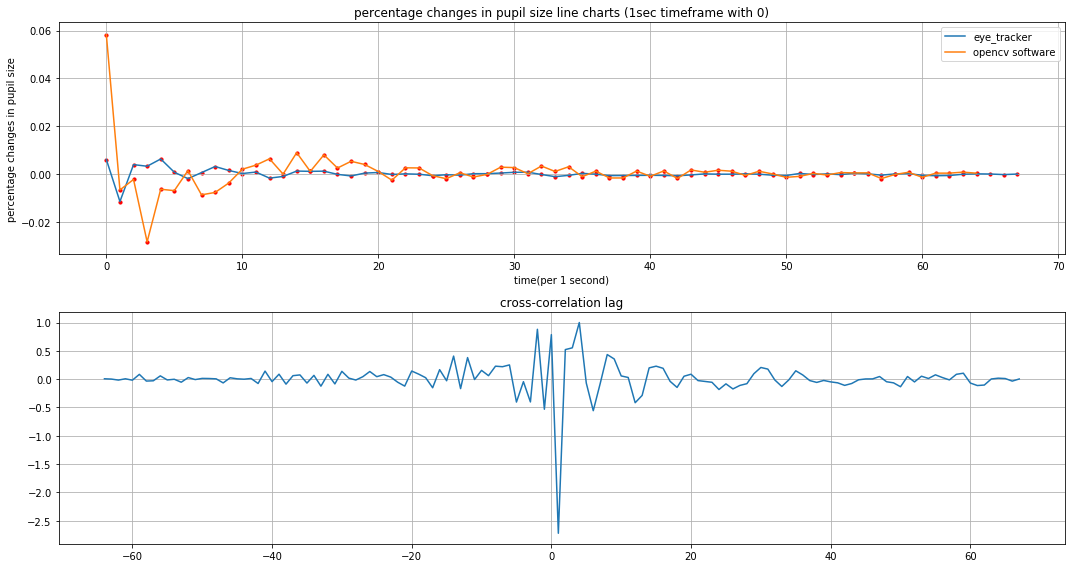

In [15]:
#normalise into 1 second timeframe
timeframe = 1
overlap = 0
df_1 = normalise_sec(opencv, timeframe, overlap)
tdf_1 = normalise_sec(tobii, timeframe, overlap)
print('[CHECK] df total ', len(df_1.keys()), ' values for ', list(df_1.keys())[-1], ' second')
print('[CHECK] tdf total ', len(tdf_1.keys()), ' values for ', list(tdf_1.keys())[-1], ' second')
py_rate_1 = cal_rate(list(df_1.values()))[1:]
tb_rate_1 = cal_rate(list(tdf_1.values()))
plot_rate(tb_rate_1, py_rate_1, 1, 0)

## 2 second timeframe (1sec overlap)

[CHECK] df total  66  values for  65  second
[CHECK] tdf total  68  values for  67  second
total matching  38 59 59 0.6440677966101694 0.6440677966101694
The cross-correlation score is:  0.3144659582966183
pearson correlation of eye_tracker (r, p): -0.1354093923408872 0.30227217532955986
pearson correlation of opencv software (r, p): 0.13270456710751474 0.31212132382889196


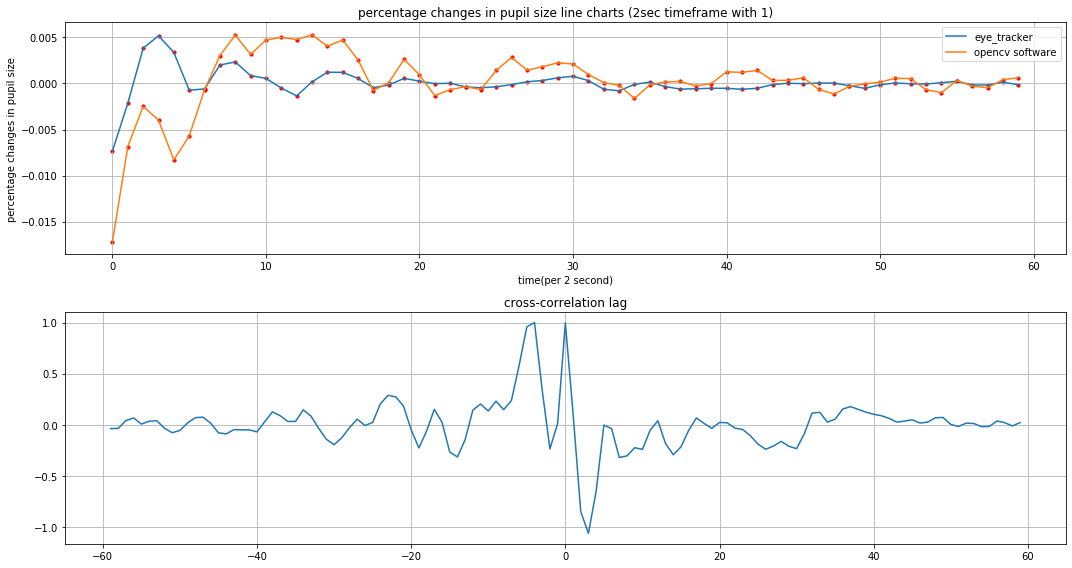

In [16]:
#normalise into 2 second timeframe
timeframe = 2
overlap = 1
df_2 = normalise_sec(opencv, timeframe, overlap)
tdf_2 = normalise_sec(tobii, timeframe, overlap)
print('[CHECK] df total ', len(df_2.keys()), ' values for ', list(df_2.keys())[-1], ' second')
print('[CHECK] tdf total ', len(tdf_2.keys()), ' values for ', list(tdf_2.keys())[-1], ' second')
py_rate_2 = cal_rate(list(df_2.values()))[4:]
tb_rate_2 = cal_rate(list(tdf_2.values()))[:-6]
plot_rate(tb_rate_2, py_rate_2, timeframe, overlap)

## 3 second timeframe (1.5sec overlap)

[CHECK] df total  43  values for  63.0  second
[CHECK] tdf total  44  values for  64.5  second
total matching  23 38 38 0.6052631578947368 0.6052631578947368
The cross-correlation score is:  0.8051460443437505
pearson correlation of eye_tracker (r, p): -0.5351086834371452 0.0004483277454581207
pearson correlation of opencv software (r, p): 0.17225200773729787 0.2943725836294742


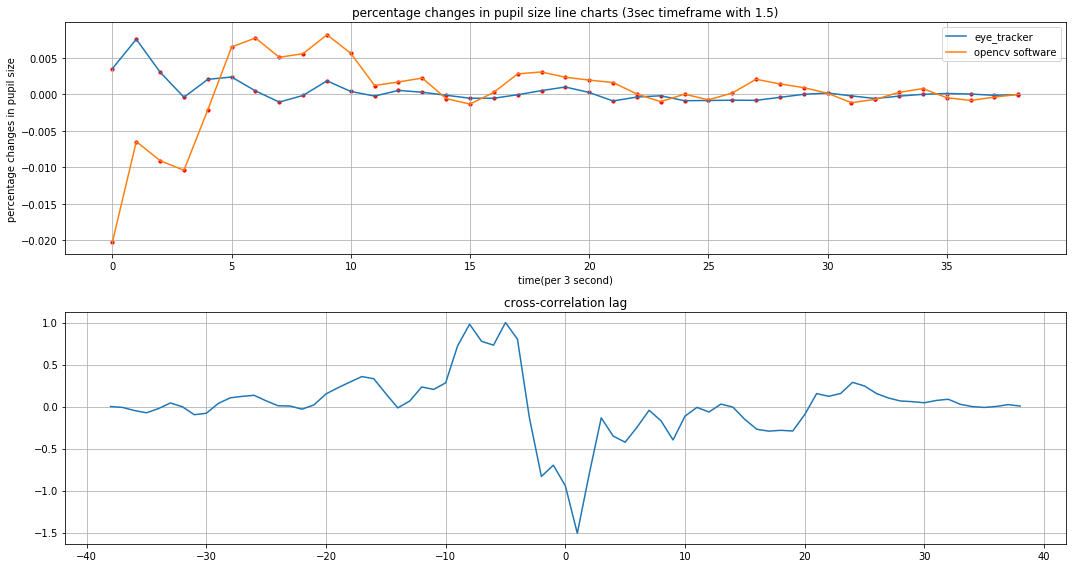

In [17]:
#normalise into 3 second timeframe
timeframe = 3
overlap = 1.5
df_3 = normalise_sec(opencv, timeframe, overlap, True)
tdf_3 = normalise_sec(tobii, timeframe, overlap, True)
print('[CHECK] df total ', len(df_3.keys()), ' values for ', list(df_3.keys())[-1], ' second')
print('[CHECK] tdf total ', len(tdf_3.keys()), ' values for ', list(tdf_3.keys())[-1], ' second')
py_rate_3 = cal_rate(list(df_3.values()))[2:]
tb_rate_3 = cal_rate(list(tdf_3.values()))[:-3]
plot_rate(tb_rate_3, py_rate_3, timeframe, overlap)

## 5 second timeframe (1.5sec overlap)

[CHECK] df total  18  values for  59.5  second
[CHECK] tdf total  19  values for  63.0  second
total matching  11 14 14 0.7857142857142857 0.7857142857142857
The cross-correlation score is:  0.9691356347056865
pearson correlation of eye_tracker (r, p): -0.5397498785999664 0.0378241746743667
pearson correlation of opencv software (r, p): -0.01665695113407833 0.9530167854784106


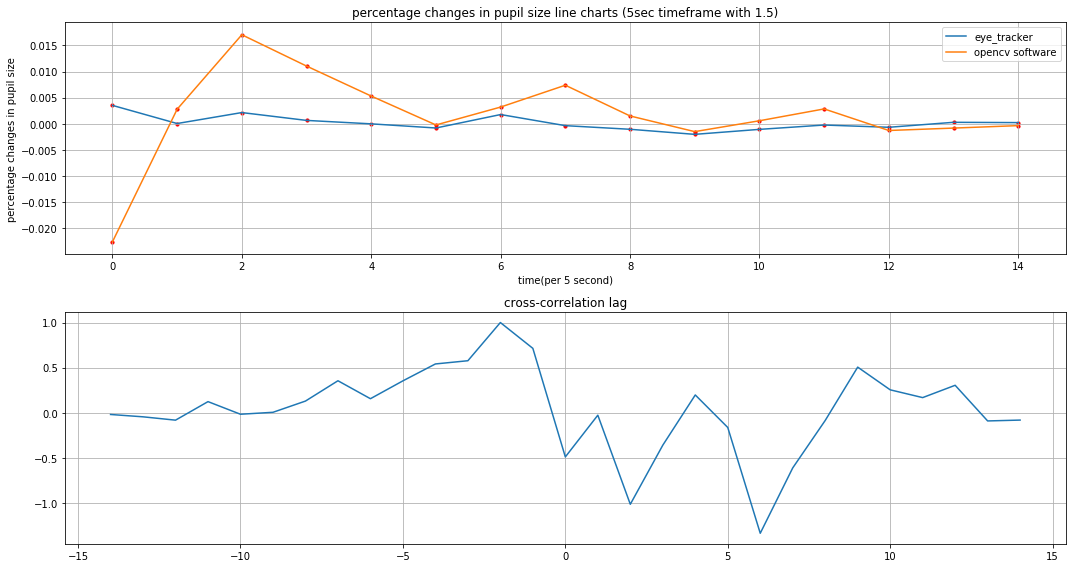

In [18]:
timeframe = 5
overlap = 1.5
df_5 = normalise_sec(opencv, timeframe, overlap, True)
tdf_5 = normalise_sec(tobii, timeframe, overlap, True)
print('[CHECK] df total ', len(df_5.keys()), ' values for ', list(df_5.keys())[-1], ' second')
print('[CHECK] tdf total ', len(tdf_5.keys()), ' values for ', list(tdf_5.keys())[-1], ' second')
py_rate_5 = cal_rate(list(df_5.values()))[1:]
tb_rate_5 = cal_rate(list(tdf_5.values()))[1:-1]
plot_rate(tb_rate_5, py_rate_5, timeframe, overlap)

## 8 second timeframe (2sec overlap)

[CHECK] df total  10  values for  54  second
[CHECK] tdf total  11  values for  60  second
total matching  4 6 6 0.6666666666666666 0.6666666666666666
The cross-correlation score is:  1.3114912243345997
pearson correlation of eye_tracker (r, p): -0.8633503661847393 0.012300378176636111
pearson correlation of opencv software (r, p): -0.8635106922212672 0.012265435741183462


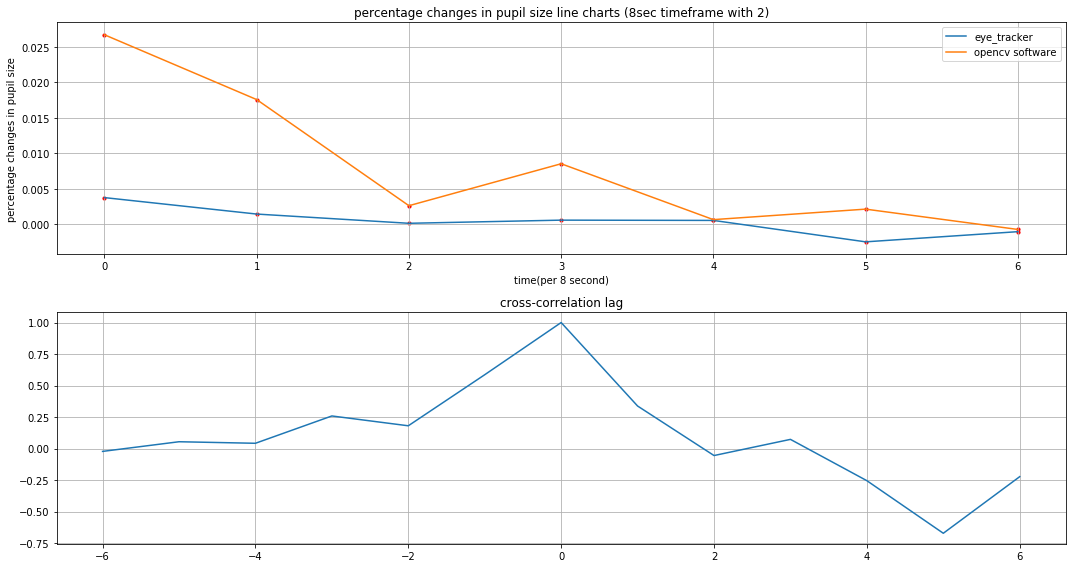

In [19]:
timeframe = 8
overlap = 2
df_8 = normalise_sec(opencv, timeframe, overlap)
tdf_8 = normalise_sec(tobii, timeframe, overlap)
print('[CHECK] df total ', len(df_8.keys()), ' values for ', list(df_8.keys())[-1], ' second')
print('[CHECK] tdf total ', len(tdf_8.keys()), ' values for ', list(tdf_8.keys())[-1], ' second')
py_rate_8 = cal_rate(list(df_8.values()))[1:]
tb_rate_8 = cal_rate(list(tdf_8.values()))[:-2]
plot_rate(tb_rate_8, py_rate_8, timeframe, overlap)

## dtw

In [20]:
from dtw import dtw, accelerated_dtw
def cal_dtw(tobii, opencv, timeframe):
    d1 = [(k, i) for k, i in enumerate(tobii)]
    d2 = [(k, i) for k, i in enumerate(opencv)]

    distance, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1, d2, dist='euclidean')

    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel('tobii')
    plt.ylabel('opencv')
    plt.title(f'DTW Minimum Path with minimum distance: {np.round(distance,2)}')
    plt.tight_layout()
    plt.savefig('02_19/sun_' + str(timeframe) + '_dtw.png', dpi=500)
    plt.show()

1 SEC


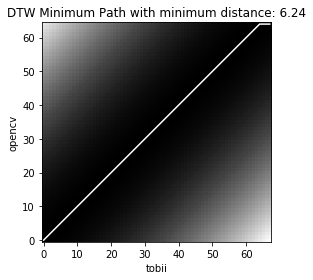

2 SEC


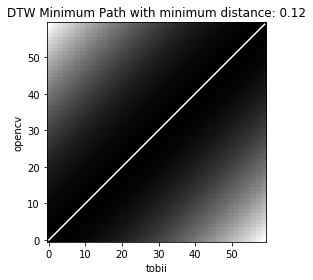

3 SEC


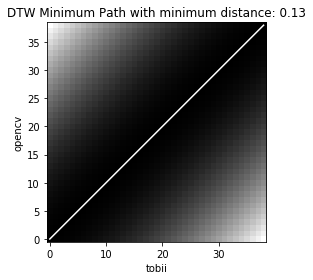

5 SEC


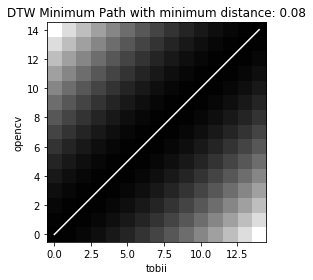

8 SEC


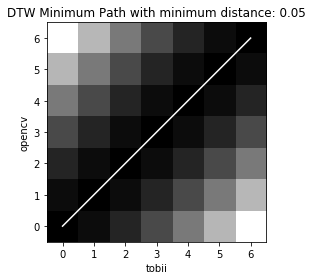

In [21]:
print('1 SEC')
cal_dtw(tb_rate_1, py_rate_1, 1)
print('2 SEC')
cal_dtw(tb_rate_2, py_rate_2, 2)
print('3 SEC')
cal_dtw(tb_rate_3, py_rate_3, 3)
print('5 SEC')
cal_dtw(tb_rate_5, py_rate_5, 5)
print('8 SEC')
cal_dtw(tb_rate_8, py_rate_8, 8)